In [1]:
import os
os.chdir("../../../")

import pandas as pd
import numpy as np

import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel 
import spacy

from scripts.python.nlp.utils import *
from scripts.python.nlp.lda import *

In [2]:
target = os.getcwd() + "/data/text/solomon_islands/"
news_path = [filename for filename in os.listdir(target)  if "news" in filename]

In [95]:
news = pd.DataFrame()
for path in news_path:
    temp = pd.read_csv(target + path).drop("Unnamed: 0", axis=1)
    temp["from"] = path.replace("_news.csv", "")
    if news.empty:
        news = temp
    else: 
        news = pd.concat([news, temp], axis=0)

In [96]:
news = news[news.news.isna() != True].reset_index(drop=True)

In [5]:
en = spacy.load('en_core_web_sm')
spacy_stopwords = list(en.Defaults.stop_words)

In [6]:
nltk_stopwords = stopwords.words("english")
nltk_unique = [sw for sw in nltk_stopwords if sw not in spacy_stopwords]
spacy_stopwords.extend(nltk_unique)

In [7]:
data = news.news.values.tolist()
data_words = list(sent_to_words(data))

In [8]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

trigram = gensim.models.Phrases(bigram[data_words], min_count=5, threshold=100)
trigram_mod = gensim.models.phrases.Phraser(trigram)

texts_preprocessed = preprocess_text(data_words, spacy_stopwords, bigram_mod,
                                     trigram_mod, nlp)

Stopwords has been done.


In [9]:
id2word = corpora.Dictionary(texts_preprocessed)
texts = texts_preprocessed
corpus = [id2word.doc2bow(text) for text in texts]

In [10]:
from gensim.models.wrappers import LdaMallet
mallet_path = os.getcwd() + '/../mallet-2.0.8/bin/mallet'
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=texts_preprocessed,
                                                        mallet_path=mallet_path,
                                                        start=2,
                                                        limit=20,
                                                        step=1)

Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 2592
total tokens: 4283306
<10> LL/token: -8.39195
<20> LL/token: -8.17774
<30> LL/token: -7.99216
<40> LL/token: -7.932

0	25	government country support work development project people community include national provide year island service woman provincial leader issue program important 
1	25	police people year public officer time report week case yesterday day team covid court member follow medium family election man 

<50> LL/token: -7.90408
<60> LL/token: -7.8882
<70> LL/token: -7.878
<80> LL/token: -7.87134
<90> LL/token: -7.86574

0	25	government country support work development project people community island include national year provide woman service leader provincial school important program 
1	25	police people year public officer time report week case yesterday day team member covid follow court issue medium add receive 

<100> LL/token: -7.86217
<110> LL/token: -7.85905
<120> LL/token: -7.85716
<130> 

<980> LL/token: -7.84332
<990> LL/token: -7.84281

0	25	government country work support community people development project year island include provide service woman national student school leader important program 
1	25	police people public year officer report time member week case issue yesterday day follow court medium team covid provincial add 

<1000> LL/token: -7.84311

Total time: 1 minutes 20 seconds
Mallet LDA: 3 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 2592
total tokens: 4283306
<10> LL/token: -8.77489
<20> LL/token: -8.44031
<30> LL/token: -8.14777
<40> LL/token: -8.05557

0	16.66667	government country support development project work woman provide include national program island community people year policy important training business fund 
1	16.66667	people year student community team school week covid health province work time service country day child area water good family 
2	16.66667	police public officer government member issue year report provinc

<660> LL/token: -7.94009
<670> LL/token: -7.9399
<680> LL/token: -7.94009
<690> LL/token: -7.94009

0	16.66667	government country support development project work woman provide include national program service important island ensure community policy fund training plan 
1	16.66667	people year community student team school time covid health week day child good work family area water province start country 
2	16.66667	police public government officer member issue report provincial year case court medium company yesterday parliament people election man statement call 

<700> LL/token: -7.9394
<710> LL/token: -7.94024
<720> LL/token: -7.93994
<730> LL/token: -7.93973
<740> LL/token: -7.93965

0	16.66667	government country support development project work woman provide include national program service island important ensure community policy fund training plan 
1	16.66667	people year community student team school covid time health week day work child good family area water province start is

<310> LL/token: -7.99361
<320> LL/token: -7.99291
<330> LL/token: -7.99299
<340> LL/token: -7.99237

0	12.5	country project support development service provide community covid health work include island area water plan increase ensure economic improve business 
1	12.5	government issue provincial member people national company parliament province election land statement add process public state leader meeting decision office 
2	12.5	police officer case report public court year people man time yesterday charge rsipf operation accuse week follow high day force 
3	12.5	work year country people woman student team school good visit training island community child support program time event today day 

<350> LL/token: -7.99296
<360> LL/token: -7.99291
<370> LL/token: -7.99217
<380> LL/token: -7.99155
<390> LL/token: -7.99241

0	12.5	country project development support service provide community work covid health include area island water increase plan ensure economic improve business 
1	12.5	g

<910> LL/token: -7.98647
<920> LL/token: -7.98607
<930> LL/token: -7.9867
<940> LL/token: -7.98639

0	12.5	country development project support provide service work include covid health community government island area ensure plan water increase economic improve 
1	12.5	government issue provincial member people company national parliament election land statement public leader province process state add meeting decision office 
2	12.5	police officer case report public court year people man time yesterday charge rsipf operation accuse week follow high area force 
3	12.5	people year work woman country student team school good visit training community child time island day program event today education 

<950> LL/token: -7.98577
<960> LL/token: -7.98604
<970> LL/token: -7.98636
<980> LL/token: -7.98581
<990> LL/token: -7.9864

0	12.5	country development project support provide service work include covid health community government island area plan ensure water increase economic improve 
1	1

<410> LL/token: -8.0251
<420> LL/token: -8.02496
<430> LL/token: -8.02357
<440> LL/token: -8.02346

0	10	police officer public report case court year man yesterday charge rsipf accuse time medium high force order person matter allege 
1	10	government issue provincial member people company parliament election land national statement leader province process add decision state public pay office 
2	10	people covid health community water service province country area week island medical travel local market food number affect western continue 
3	10	country support development project government provide work include ensure service policy island plan economic business improve fund develop sector assistance 
4	10	woman year student work people school team community country training good visit child event program day education today time young 

<450> LL/token: -8.02296
<460> LL/token: -8.02311
<470> LL/token: -8.02367
<480> LL/token: -8.02343
<490> LL/token: -8.02327

0	10	police officer report

<910> LL/token: -8.02847
<920> LL/token: -8.02937
<930> LL/token: -8.02831
<940> LL/token: -8.02956

0	10	police officer public report case court year man yesterday charge rsipf accuse time high medium force order matter allege incident 
1	10	government provincial issue member people company parliament leader election land national statement province process add decision state public office constituency 
2	10	people covid health community service water country province area week medical island travel market local food work affect include number 
3	10	country support development project government provide work include policy service island economic business plan improve ensure fund develop sector assistance 
4	10	woman year student school work people team good training visit community child country event time day education today program young 

<950> LL/token: -8.02951
<960> LL/token: -8.02928
<970> LL/token: -8.02974
<980> LL/token: -8.03044
<990> LL/token: -8.03054

0	10	police office

<310> LL/token: -8.0727
<320> LL/token: -8.07108
<330> LL/token: -8.07222
<340> LL/token: -8.07218

0	8.33333	government member provincial people issue leader national parliament election statement province decision state medium add meeting official country group constituency 
1	8.33333	people community covid health country province water service continue week area medical include affect island provide response western case facility 
2	8.33333	police officer public court case man report year charge rsipf yesterday accuse force matter order allege incident time arrest victim 
3	8.33333	year student school team woman good time visit work event child day people today young start youth education week family 
4	8.33333	support country development project work provide include island program government economic improve policy community develop sector opportunity region woman important 
5	8.33333	government year business company land fund work service market local pay issue add budget month pr

<710> LL/token: -8.06726
<720> LL/token: -8.0671
<730> LL/token: -8.0674
<740> LL/token: -8.06852

0	8.33333	government member provincial people issue leader parliament election national statement province state decision medium add meeting official group process public 
1	8.33333	people community covid health country water province service area island medical week continue food travel include affect report live western 
2	8.33333	police officer public court case man year report charge yesterday rsipf accuse force matter allege order time incident arrest victim 
3	8.33333	woman year student school team work good event child time visit day training young today education people youth start play 
4	8.33333	support country development project government work provide include island economic policy improve program develop sector community region plan important ensure 
5	8.33333	year business company land government work local market fund service pay add month cost issue money road expect incr

<100> LL/token: -8.11442
<110> LL/token: -8.10933
<120> LL/token: -8.10559
<130> LL/token: -8.10334
<140> LL/token: -8.10072

0	7.14286	project development support country provide economic improve include service fund sector island develop region business increase management work resource infrastructure 
1	7.14286	government provincial member people country national leader issue province parliament meeting state add policy budget minister address meet current official 
2	7.14286	team year time visit week island good local start work country expect month today yesterday place day open play travel 
3	7.14286	people covid health community water service area province medical continue country case report affect supply response road food situation live 
4	7.14286	police officer court case man year public charge rsipf accuse yesterday force report allege incident arrest victim matter investigation time 
5	7.14286	issue company public election land medium report process pay constituency office

<450> LL/token: -8.09072
<460> LL/token: -8.09056
<470> LL/token: -8.09123
<480> LL/token: -8.09103
<490> LL/token: -8.09046

0	7.14286	project development support country provide economic service improve include sector fund work develop island region plan resource increase business management 
1	7.14286	government provincial people member country national leader issue province parliament meeting state add minister address statement executive official meet group 
2	7.14286	team year time island visit good week country start local today expect day month place travel yesterday leave play open 
3	7.14286	people covid health community water service area medical province country affect food case report continue supply road situation response include 
4	7.14286	police officer court case man public year charge rsipf accuse yesterday report force allege incident arrest victim matter investigation vehicle 
5	7.14286	public company issue election land report medium pay process constituency busin

<800> LL/token: -8.09003
<810> LL/token: -8.08948
<820> LL/token: -8.0893
<830> LL/token: -8.08913
<840> LL/token: -8.0892

0	7.14286	project development support country provide economic service include improve work sector fund develop island plan government region resource management infrastructure 
1	7.14286	government provincial people member country leader national issue province parliament meeting state add minister statement executive official address decision political 
2	7.14286	team year time island visit good week country start local today expect day travel place month yesterday play leave open 
3	7.14286	people covid health community water service area province medical country food affect case continue report supply response road situation risk 
4	7.14286	police officer court case man public year charge rsipf accuse yesterday force report allege incident arrest victim matter investigation high 
5	7.14286	company public election land issue report pay process medium business c

<150> LL/token: -8.12149
<160> LL/token: -8.11885
<170> LL/token: -8.11689
<180> LL/token: -8.1164
<190> LL/token: -8.11481

0	6.25	woman student community work school program training child support year event visit education people youth opportunity attend young important country 
1	6.25	country covid health service people continue include case medical week number community provide report response ensure support province work situation 
2	6.25	government provincial member people leader national parliament election province issue meeting constituency minister group add official political executive state current 
3	6.25	police officer court man case charge rsipf public year accuse force yesterday allege incident arrest victim report matter investigation vehicle 
4	6.25	people area water local market work road food island community site travel village add live supply ship affect boat product 
5	6.25	issue company public medium report pay land business statement claim process money receiv

<500> LL/token: -8.10549
<510> LL/token: -8.10566
<520> LL/token: -8.10641
<530> LL/token: -8.10618
<540> LL/token: -8.10617

0	6.25	woman community work student school program training year support child event people education youth young important attend opportunity learn speak 
1	6.25	country covid health service people case medical week continue provide include response number province support ensure community situation total risk 
2	6.25	government provincial member people leader national parliament election province issue meeting constituency minister add executive group official political state premier 
3	6.25	police officer court man case public charge year rsipf accuse force yesterday allege report incident arrest victim matter investigation vehicle 
4	6.25	people area water local market work food road island community site problem village live add product ship small boat travel 
5	6.25	issue company public land report medium pay business government claim money process stateme

<850> LL/token: -8.11452
<860> LL/token: -8.11423
<870> LL/token: -8.11409
<880> LL/token: -8.1139
<890> LL/token: -8.11404

0	6.25	community work woman student school program training year child support people education youth young family important opportunity speak encourage learn 
1	6.25	covid health service country people case week medical continue include provide response number ensure province situation support risk hospital total 
2	6.25	government provincial member people leader national parliament province election issue meeting constituency add minister group executive political state decision premier 
3	6.25	police officer court man case public charge year rsipf accuse force yesterday allege incident report arrest victim matter investigation vehicle 
4	6.25	people area water local market food road island work site community village live add small product ship boat problem sell 
5	6.25	issue company public land report government medium pay business claim money process stateme

<150> LL/token: -8.15075
<160> LL/token: -8.14884
<170> LL/token: -8.14614
<180> LL/token: -8.14601
<190> LL/token: -8.14498

0	5.55556	team visit country event island year time good today play official host open hold tourism game lead ramsi place culture 
1	5.55556	people area community water island report food live village affect problem find province home disaster issue call boat western time 
2	5.55556	government provincial issue parliament member public statement decision state meeting executive national process concern question minister interest office premier claim 
3	5.55556	police officer court man case public charge rsipf accuse year allege incident force arrest victim yesterday matter investigation law report 
4	5.55556	people woman member community leader election family day work young constituency youth child year country speak group good support today 
5	5.55556	business company land year market local increase pay cost road money log percent industry operation add product

<450> LL/token: -8.13689
<460> LL/token: -8.13563
<470> LL/token: -8.13613
<480> LL/token: -8.13631
<490> LL/token: -8.13614

0	5.55556	team visit country event year time island good play today official host hold tourism open game lead ramsi place culture 
1	5.55556	people area water community island report food live affect village problem find disaster home time boat issue site province call 
2	5.55556	government provincial issue parliament member public statement decision state meeting executive national concern office question process claim minister interest premier 
3	5.55556	police officer court man public case charge rsipf accuse year allege force incident yesterday arrest victim matter investigation vehicle report 
4	5.55556	people woman community member election leader family work day province constituency child youth young country support good speak year today 
5	5.55556	business company land year market pay local increase money cost road fund log percent payment industry oper

<750> LL/token: -8.13234
<760> LL/token: -8.13265
<770> LL/token: -8.13316
<780> LL/token: -8.13228
<790> LL/token: -8.13222

0	5.55556	team visit country event time year island good today play host hold official game tourism open lead ramsi culture place 
1	5.55556	people area water community island road food report live village affect disaster find site home problem boat time call small 
2	5.55556	government issue provincial parliament member public statement decision state meeting executive concern office question leader medium minister interest claim process 
3	5.55556	police officer court man public case charge rsipf accuse year allege incident force arrest victim yesterday matter report investigation order 
4	5.55556	people woman community member province provincial election leader family day constituency work youth child young support national good add speak 
5	5.55556	business company land year market pay increase money local cost fund log percent payment industry add operation

<50> LL/token: -8.29999
<60> LL/token: -8.25191
<70> LL/token: -8.22213
<80> LL/token: -8.20241
<90> LL/token: -8.18851

0	5	people water area community operation road travel village site affect live province honiara time disaster supply ship boat home local 
1	5	government development project support provincial national service policy work plan provide province fund ensure infrastructure include budget improve rural address 
2	5	country business increase economic market local high percent impact economy island resource food industry small investment growth year environment product 
3	5	police officer court man case charge rsipf accuse public year allege incident arrest victim investigation force vehicle report matter high 
4	5	year land public receive pay month week process money office accord bill payment service give confirm expect total explain complete 
5	5	team covid health medical case country week hospital time game play number good continue emergency test vaccine response foll

<310> LL/token: -8.12718
<320> LL/token: -8.12758
<330> LL/token: -8.12793
<340> LL/token: -8.12785

0	5	people water area community road travel operation village time live honiara site disaster affect home ship boat supply market passenger 
1	5	government development project support work provide policy service plan national ensure fund improve include infrastructure rural system budget implement area 
2	5	country increase business local year economic island high percent economy impact food market resource industry small growth environment investment product 
3	5	police officer court case man charge rsipf accuse public year allege incident arrest victim investigation report force matter vehicle high 
4	5	company land year public pay receive money month process business service office bill payment give accord week work explain worker 
5	5	team covid health medical country case week time hospital game play good continue emergency test vaccine number service competition today 
6	5	woman s

<580> LL/token: -8.12845
<590> LL/token: -8.12928

0	5	people water area community road travel village live time operation site honiara disaster affect home ship boat supply island passenger 
1	5	government development project support work provide policy service plan national ensure fund improve include infrastructure rural system community program area 
2	5	country increase business local year island high economic percent economy market impact food tourism industry resource small environment product growth 
3	5	police officer court case man charge rsipf accuse public year allege incident arrest victim investigation report force matter vehicle high 
4	5	company land year pay receive money public business service process month payment give office explain accord director issue reveal cost 
5	5	team covid health medical country case week time hospital game play good test vaccine number continue emergency follow care competition 
6	5	woman student school community child year training work 

<850> LL/token: -8.13176
<860> LL/token: -8.13268
<870> LL/token: -8.1317
<880> LL/token: -8.13189
<890> LL/token: -8.13333

0	5	people water area community road travel village time live honiara operation site affect home disaster ship boat supply island passenger 
1	5	government development project support provide work service plan policy fund national ensure improve include infrastructure rural community system program area 
2	5	country increase business local year island high market economic percent tourism economy food impact industry small environment resource product growth 
3	5	police officer court man case charge rsipf accuse public year allege incident arrest victim investigation report matter force vehicle prosecution 
4	5	company land year pay receive money business public issue government process payment service give month log cost reveal director worker 
5	5	team covid health medical case country week time hospital game play good number test vaccine continue emergency serv

<100> LL/token: -8.22469
<110> LL/token: -8.21805
<120> LL/token: -8.21332
<130> LL/token: -8.20929
<140> LL/token: -8.207

0	4.54545	government development project support policy country national plan fund provide economic include ensure infrastructure develop partner improve sector address key 
1	4.54545	student school health service year water child education medical staff receive provide week facility supply support hospital study teacher work 
2	4.54545	company land work area government issue business sign project add log site year local operation activity agreement people building landowner 
3	4.54545	government provincial member parliament province election people national leader constituency executive meeting political premier minister bill yesterday year candidate general 
4	4.54545	country increase market business island year local food percent tourism high small economy industry product cost fishery impact grow agriculture 
5	4.54545	police court case man charge accuse year 

<350> LL/token: -8.17066
<360> LL/token: -8.16936
<370> LL/token: -8.16836
<380> LL/token: -8.16586
<390> LL/token: -8.16661

0	4.54545	government development project support policy fund provide national plan economic ensure improve develop service include infrastructure sector implement key address 
1	4.54545	student school health service year water education child medical receive staff provide week facility supply study hospital teacher care work 
2	4.54545	company land work area business issue local add log site operation sign complete year building director carry process activity agreement 
3	4.54545	government provincial member province parliament election national people constituency meeting leader executive political yesterday premier year bill general act candidate 
4	4.54545	country increase market year business island food local percent tourism high small industry economy product cost fishery impact agriculture grow 
5	4.54545	police officer court case man charge accuse year 

<600> LL/token: -8.15377
<610> LL/token: -8.15414
<620> LL/token: -8.15278
<630> LL/token: -8.15357
<640> LL/token: -8.15315

0	4.54545	government development project support policy fund provide national plan economic ensure service improve infrastructure develop sector include rural key implement 
1	4.54545	student school health year service water education child medical staff receive provide week facility supply hospital study teacher centre care 
2	4.54545	company land work business area issue operation local site add log year complete worker sign process director building carry construction 
3	4.54545	government provincial member province parliament election people national constituency executive yesterday premier year bill political week leader general act current 
4	4.54545	country increase market island year food local percent tourism business high small industry economy product impact fishery agriculture grow cost 
5	4.54545	police officer court case man charge accuse public ye

<850> LL/token: -8.14709
<860> LL/token: -8.14742
<870> LL/token: -8.14718
<880> LL/token: -8.14737
<890> LL/token: -8.14741

0	4.54545	government development project support policy provide fund plan national economic service improve ensure sector develop include rural infrastructure implement management 
1	4.54545	student school year health service water education child medical receive staff week provide supply study hospital teacher facility care centre 
2	4.54545	company work land business area road local operation log site issue add worker complete year director building carry build construction 
3	4.54545	government provincial member province parliament election people national constituency executive yesterday premier act bill political leader general week year office 
4	4.54545	increase country market island year food local percent tourism small business high industry economy product impact fishery world grow agriculture 
5	4.54545	police officer court case man charge rsipf accus

<100> LL/token: -8.20139
<110> LL/token: -8.19392
<120> LL/token: -8.18481
<130> LL/token: -8.18147
<140> LL/token: -8.17618

0	4.16667	government provincial member province national parliament leader meeting issue budget decision executive minister political statement current policy premier bill add 
1	4.16667	team event good time play today day year host game hold island country culture place start open competition player match 
2	4.16667	court election case charge year accuse allege yesterday public high matter victim man prosecution time order candidate vote face date 
3	4.16667	covid health country case medical people response risk province disaster report hospital situation border continue week include emergency test vaccine 
4	4.16667	issue company land public business pay report claim money question log payment concern process raise statement deal call medium landowner 
5	4.16667	water area market island local food product ship small village people sell environment site produce

<350> LL/token: -8.15619
<360> LL/token: -8.15602
<370> LL/token: -8.15634
<380> LL/token: -8.15577
<390> LL/token: -8.15566

0	4.16667	government provincial member province parliament national leader meeting executive decision issue political current minister statement premier bill opposition group state 
1	4.16667	team event time play good today day year host hold game island start culture open place competition final lead player 
2	4.16667	court election case charge year accuse public allege high yesterday man victim matter time prosecution order candidate face vote date 
3	4.16667	covid health country case medical people response province disaster service hospital risk border include week situation report emergency test continue 
4	4.16667	issue company land public report business claim pay question concern log payment money statement raise process deal medium accord landowner 
5	4.16667	water market area island local food product small village ship people sell high supply export f

<600> LL/token: -8.15526
<610> LL/token: -8.15506
<620> LL/token: -8.15552
<630> LL/token: -8.15428
<640> LL/token: -8.15582

0	4.16667	government provincial member province parliament national leader meeting executive decision political issue minister premier statement current group bill opposition state 
1	4.16667	team event good time today play day year host game hold island start culture place open competition player match lead 
2	4.16667	court election case charge year accuse public allege high yesterday man matter victim prosecution time order candidate face vote date 
3	4.16667	covid health country case medical people response province hospital service border include disaster risk week public situation continue emergency test 
4	4.16667	issue company land public report business claim pay concern medium question statement payment process log money deal raise call law 
5	4.16667	water market area island food local product people small village ship increase sell high export supply 

<850> LL/token: -8.1602
<860> LL/token: -8.16029
<870> LL/token: -8.16071
<880> LL/token: -8.16053
<890> LL/token: -8.16192

0	4.16667	government provincial member parliament province national leader meeting executive decision political issue minister premier current statement bill group opposition state 
1	4.16667	team event visit time good play today host day game island hold place start culture year open official competition lead 
2	4.16667	court election case year charge accuse public allege high yesterday man matter victim prosecution time order candidate face date day 
3	4.16667	covid health country case medical people response hospital service province border risk include week disaster public emergency test vaccine continue 
4	4.16667	issue company land public report medium business claim concern question pay statement log payment raise deal process money call add 
5	4.16667	water market area island food local people product small village sell high increase export produce farmer

<50> LL/token: -8.32901
<60> LL/token: -8.29101
<70> LL/token: -8.26828
<80> LL/token: -8.25349
<90> LL/token: -8.24306

0	3.84615	people woman visit country community event leader island youth family year young day life church world live nation today speak 
1	3.84615	business company year service pay fund cost increase financial percent log budget money payment total worker grant operation month economy 
2	3.84615	government provincial province issue land national people add executive premier decision meeting western address plan guadalcanal policy sign development statement 
3	3.84615	project community market island local rural food tourism country area resource activity environment management small product industry impact fishery improve 
4	3.84615	member parliament election leader constituency process political bill general act candidate vote party group people public office minister law opposition 
5	3.84615	people water area road work travel village site affect time live home hon

<250> LL/token: -8.18585
<260> LL/token: -8.18566
<270> LL/token: -8.18454
<280> LL/token: -8.18381
<290> LL/token: -8.18378

0	3.84615	people woman community visit family country child young youth leader event day life year church live today work speak peace 
1	3.84615	business company year service pay fund cost increase percent log financial money payment operate total worker grant month operation budget 
2	3.84615	government provincial province national land people development issue plan executive western work premier add guadalcanal policy meeting ministry official meet 
3	3.84615	project community market local rural food area tourism island activity resource small country industry management environment product improve fishery impact 
4	3.84615	member parliament election leader constituency process political bill general act minister group candidate vote party office yesterday official pass confidence 
5	3.84615	people water area road travel work site island village ship boat affe

<450> LL/token: -8.18361
<460> LL/token: -8.18469
<470> LL/token: -8.18354
<480> LL/token: -8.18312
<490> LL/token: -8.18429

0	3.84615	people woman community family child country young youth leader visit day life event year church work live peace speak culture 
1	3.84615	business company year service pay cost increase percent financial fund log money payment total grant worker operate public operation month 
2	3.84615	government provincial province national land people development issue plan work western premier policy add executive ministry guadalcanal budget official visit 
3	3.84615	project community market local area food rural tourism activity island resource management country industry environment small product fishery agriculture improve 
4	3.84615	member parliament election constituency leader process bill general act political minister candidate party vote office yesterday group official hold day 
5	3.84615	water people area road travel disaster island affect village ship sit

<650> LL/token: -8.18579
<660> LL/token: -8.18652
<670> LL/token: -8.18532
<680> LL/token: -8.18526
<690> LL/token: -8.18546

0	3.84615	people woman community family child country young youth leader life visit day work event church live year today peace speak 
1	3.84615	business company year service pay cost percent money financial log increase payment fund total grant worker public month receive operation 
2	3.84615	government provincial project province national land development people work fund plan premier western ministry budget policy guadalcanal issue add executive 
3	3.84615	market project local community food area island tourism activity country small resource industry environment product management rural fishery increase agriculture 
4	3.84615	member parliament election constituency leader process meeting bill act minister general yesterday political candidate hold vote official party office group 
5	3.84615	water people area road travel disaster island affect village ship bo

<850> LL/token: -8.18266
<860> LL/token: -8.18263
<870> LL/token: -8.18259
<880> LL/token: -8.18297
<890> LL/token: -8.18215

0	3.84615	people woman community family child young youth country leader work visit life day event church live year peace support culture 
1	3.84615	business company year service pay cost percent financial money log payment increase total grant fund public worker receive month report 
2	3.84615	government project provincial province national development land fund people work plan budget premier ministry western infrastructure rural policy guadalcanal funding 
3	3.84615	market local island country food area tourism community industry activity resource product increase environment small fishery high management agriculture impact 
4	3.84615	member parliament election constituency process meeting leader minister bill act hold general yesterday political official candidate party vote office week 
5	3.84615	water people area road travel disaster affect island ship tim

<50> LL/token: -8.33865
<60> LL/token: -8.2931
<70> LL/token: -8.26658
<80> LL/token: -8.24901
<90> LL/token: -8.23667

0	3.57143	government parliament national budget policy current fund ministry year bill add system opposition member development propose corruption pass power change 
1	3.57143	company land issue log operation add operate area landowner local ship director mining sign process site accord owner place carry 
2	3.57143	court case man year charge accuse allege victim high matter prosecution yesterday face time public allegedly hear order trial count 
3	3.57143	covid health country service case medical people hospital border risk emergency test vaccine week care continue travel include response situation 
4	3.57143	public report issue medium statement pay claim office question payment receive call decision raise information state concern action matter give 
5	3.57143	provincial people province election member western constituency national day week guadalcanal premier execut

<250> LL/token: -8.19786
<260> LL/token: -8.19732
<270> LL/token: -8.19618
<280> LL/token: -8.19572
<290> LL/token: -8.19452

0	3.57143	government parliament national policy budget current ministry fund bill add opposition political system year propose development minister power decision address 
1	3.57143	company land issue operation log ship operate local landowner director area add process mining owner accord follow sign vessel board 
2	3.57143	court case year charge accuse man allege victim high matter prosecution yesterday public face time order allegedly hear money trial 
3	3.57143	covid health country service medical case people hospital border risk emergency test vaccine week travel response include continue care clinic 
4	3.57143	issue public report medium statement concern call raise question claim decision pay payment office state action information deal matter receive 
5	3.57143	provincial province people member election western constituency national executive guadalcanal w

<450> LL/token: -8.19034
<460> LL/token: -8.19059
<470> LL/token: -8.18992
<480> LL/token: -8.19134
<490> LL/token: -8.1905

0	3.57143	government parliament national policy budget current fund ministry development bill year political system add propose ensure process minister address corruption 
1	3.57143	company land operation issue log operate ship landowner director local add process mining vessel sign follow owner accord board area 
2	3.57143	court case year charge accuse man allege victim high matter public yesterday prosecution face order time allegedly hear money trial 
3	3.57143	covid health country service medical case people hospital risk emergency test vaccine response border continue week include care provide number 
4	3.57143	issue report public medium statement concern call decision question raise claim pay payment state action office deal add information matter 
5	3.57143	provincial province member people election western constituency executive national guadalcanal week 

<650> LL/token: -8.1885
<660> LL/token: -8.18728
<670> LL/token: -8.18634
<680> LL/token: -8.18613
<690> LL/token: -8.18584

0	3.57143	government national parliament policy budget ministry fund development year current bill political system process add ensure propose address minister reform 
1	3.57143	company land operation log issue operate ship landowner local director process mining travel vessel follow owner passenger accord sign flight 
2	3.57143	court case year charge accuse man allege victim high matter public prosecution yesterday face time money order allegedly hear trial 
3	3.57143	covid health country service medical case people hospital response emergency test risk vaccine include border week continue care situation clinic 
4	3.57143	issue report public medium statement concern call decision raise question claim state action add pay deal payment group office opposition 
5	3.57143	provincial province member people election western constituency executive yesterday premier nat

<850> LL/token: -8.18374
<860> LL/token: -8.18321
<870> LL/token: -8.18341
<880> LL/token: -8.18405
<890> LL/token: -8.18348

0	3.57143	government national policy parliament development budget ministry year fund public service current bill system ensure process add address propose reform 
1	3.57143	company land operation log issue operate ship landowner travel director process local business pay mining follow vessel add owner carry 
2	3.57143	court case year charge accuse man allege victim high matter public prosecution yesterday face order money time allegedly hear trial 
3	3.57143	covid health country medical case service people hospital risk response emergency test vaccine include week border care continue number situation 
4	3.57143	issue report medium statement concern decision call public raise question state claim add action deal opposition group payment pay office 
5	3.57143	provincial member province people election constituency western executive yesterday premier general week

<50> LL/token: -8.37963
<60> LL/token: -8.33057
<70> LL/token: -8.29767
<80> LL/token: -8.27744
<90> LL/token: -8.26327

0	3.33333	court case charge year accuse man allege victim high matter public prosecution yesterday face allegedly order time money hear trial 
1	3.33333	government project development fund service support infrastructure rural budget financial year ministry provide improve funding sector plan policy system implement 
2	3.33333	health covid service medical country provide support people include response hospital worker work community vaccine emergency ensure receive care continue 
3	3.33333	country travel return week number confirm case border day follow arrive ship record test passenger boat month positive remain time 
4	3.33333	member parliament election process constituency act general bill office candidate vote yesterday national pass party week day meeting year number 
5	3.33333	student school community training water program education work year study disaster pro

<250> LL/token: -8.20681
<260> LL/token: -8.2051
<270> LL/token: -8.20326
<280> LL/token: -8.20301
<290> LL/token: -8.20199

0	3.33333	court case year charge accuse man allege victim high public matter prosecution yesterday face allegedly order time hear trial evidence 
1	3.33333	project government development fund support service provide infrastructure rural improve budget financial ministry sector year funding access work system include 
2	3.33333	covid health medical country case service people hospital response include provide risk emergency support vaccine community test supply care continue 
3	3.33333	travel country week return island day arrive tourism confirm time ship boat border follow passenger month expect number service close 
4	3.33333	member parliament election process constituency act general bill candidate vote pass yesterday party office year number day registration motion national 
5	3.33333	student school training program water community education year work staff st

<450> LL/token: -8.19131
<460> LL/token: -8.1891
<470> LL/token: -8.18977
<480> LL/token: -8.18947
<490> LL/token: -8.18877

0	3.33333	court case year charge accuse man allege victim high public matter prosecution yesterday face allegedly time hear order trial count 
1	3.33333	project development government support service fund provide infrastructure rural improve financial work budget ministry access build funding year include assistance 
2	3.33333	covid health medical country case service people hospital response disaster community supply risk include emergency test vaccine provide receive care 
3	3.33333	water travel tourism island return day arrive week time ship country boat confirm passenger border service close follow leave flight 
4	3.33333	member parliament election process general act bill constituency candidate vote pass day party yesterday number office chief motion group registration 
5	3.33333	student school training program year work education staff study teacher learn t

<650> LL/token: -8.18034
<660> LL/token: -8.17885
<670> LL/token: -8.17999
<680> LL/token: -8.1801
<690> LL/token: -8.17899

0	3.33333	court case year charge accuse man allege victim high public matter prosecution yesterday face time allegedly order hear trial count 
1	3.33333	project service development support fund government provide work infrastructure rural improve financial budget ministry access build area year road funding 
2	3.33333	covid health country medical case service hospital people response risk disaster emergency include test vaccine provide community supply receive continue 
3	3.33333	water travel island tourism time return ship boat arrive passenger week day leave confirm home flight close vessel source resident 
4	3.33333	member parliament election process general bill act constituency candidate vote pass day party yesterday number motion group registration office national 
5	3.33333	student school training program year work education staff study week teacher learn 

<850> LL/token: -8.18073
<860> LL/token: -8.17952
<870> LL/token: -8.17941
<880> LL/token: -8.17909
<890> LL/token: -8.17948

0	3.33333	court case year charge accuse man allege victim high public matter prosecution yesterday face time allegedly hear order trial count 
1	3.33333	project service support development fund provide work government infrastructure rural improve financial budget build access road building area ministry funding 
2	3.33333	covid health country medical case hospital service response people border emergency test include vaccine risk continue care clinic measure patient 
3	3.33333	water travel people island disaster area ship boat home time return affect passenger tourism arrive leave site week day flight 
4	3.33333	member parliament election process general bill act constituency candidate vote yesterday day pass party group number motion office chief registration 
5	3.33333	student school training year program work education staff study teacher week train learn opp

<50> LL/token: -8.37302
<60> LL/token: -8.32321
<70> LL/token: -8.29412
<80> LL/token: -8.27608
<90> LL/token: -8.264

0	3.125	business company land money local market log pay product percent export landowner cost increase mining farmer high year sell price 
1	3.125	event island year local day tourism country visit world culture host time international open big traditional bring story solomon hold 
2	3.125	covid health country case response people continue public number test vaccine risk border emergency measure province positive week report remain 
3	3.125	country development economic policy sector develop resource economy region impact increase island growth global key level sustainable challenge strategy fishery 
4	3.125	year student school education week receive study teacher pay high form month add number staff parent yesterday start time award 
5	3.125	operation travel week ship boat honiara officer arrive passenger return carry market transport flight follow confirm vessel day s

<250> LL/token: -8.21739
<260> LL/token: -8.2167
<270> LL/token: -8.21766
<280> LL/token: -8.21714
<290> LL/token: -8.21641

0	3.125	business company land local money log market pay product export landowner cost mining farmer high percent industry increase payment price 
1	3.125	event island year local day tourism country world culture visit host time traditional international celebration open bring hold big celebrate 
2	3.125	covid health country case response test vaccine continue risk people emergency number public measure border include record positive report total 
3	3.125	development country policy economic sector develop resource economy region impact increase growth key strategy global sustainable level challenge fishery management 
4	3.125	year student school education week receive study teacher pay form high add number month staff parent start yesterday award complete 
5	3.125	operation travel road vehicle public honiara area market ship boat week passenger transport officer 

<450> LL/token: -8.20973
<460> LL/token: -8.21009
<470> LL/token: -8.20691
<480> LL/token: -8.20723
<490> LL/token: -8.20697

0	3.125	business company land money local log pay market product export landowner percent cost mining increase payment farmer high industry price 
1	3.125	event year local day island tourism country world culture visit host traditional celebration international open hold big time celebrate solomon 
2	3.125	covid health country case medical hospital response test vaccine emergency risk number public people continue measure week patient include border 
3	3.125	development country policy economic sector develop resource economy key increase impact growth strategy global region sustainable challenge level ensure management 
4	3.125	year student school education week receive study teacher high form pay add number start month staff parent award yesterday complete 
5	3.125	operation travel road vehicle public honiara market ship boat officer transport week area passeng

<650> LL/token: -8.20064
<660> LL/token: -8.20046
<670> LL/token: -8.20124
<680> LL/token: -8.19993
<690> LL/token: -8.19961

0	3.125	business company land money local log pay market product percent export cost landowner payment increase mining farmer high sell price 
1	3.125	event year local day island tourism country visit world culture traditional celebration host international hold open time celebrate solomon include 
2	3.125	covid health country case medical hospital test vaccine response emergency risk number measure care clinic week patient border nurse positive 
3	3.125	development country policy economic sector develop resource economy key growth increase region strategy global impact ensure challenge sustainable address level 
4	3.125	year student school education week receive study teacher add form high number staff start pay parent month award time yesterday 
5	3.125	operation travel road public vehicle honiara market ship boat week transport officer passenger yesterday fli

<850> LL/token: -8.19673
<860> LL/token: -8.19714
<870> LL/token: -8.19703
<880> LL/token: -8.19837
<890> LL/token: -8.19725

0	3.125	business company land money pay log local market product percent payment export cost landowner increase mining high farmer sell year 
1	3.125	event year day local island tourism country visit world culture traditional celebration host open hold international celebrate include time attend 
2	3.125	covid health case country medical hospital response emergency test vaccine risk care clinic number measure patient week people include nurse 
3	3.125	development country policy economic sector develop resource economy key region growth strategy increase challenge global impact ensure sustainable plan level 
4	3.125	year student school education week receive study teacher high form add number staff parent start month pay yesterday award complete 
5	3.125	operation road travel public vehicle honiara market ship week boat transport officer passenger yesterday fligh

<50> LL/token: -8.39624
<60> LL/token: -8.34743
<70> LL/token: -8.31829
<80> LL/token: -8.29523
<90> LL/token: -8.27888

0	2.94118	covid case country week travel border confirm public test vaccine continue number follow day measure flight passenger person vessel positive 
1	2.94118	member parliament election constituency statement decision political leader bill public opposition candidate vote process group general act office minister motion 
2	2.94118	development government policy support national ensure plan develop key system priority sector economic implement strategy include provide stakeholder achieve partner 
3	2.94118	people area water island community live village affect report damage problem continue resident experience add close situation part year recent 
4	2.94118	government provincial province land people national issue executive western premier guadalcanal add landowner meeting statement decision propose call current yesterday 
5	2.94118	company pay public money business

<200> LL/token: -8.22537
<210> LL/token: -8.22429
<220> LL/token: -8.22157
<230> LL/token: -8.22069
<240> LL/token: -8.22088

0	2.94118	covid case country travel border week public confirm test vaccine ship passenger number follow people flight continue measure day risk 
1	2.94118	member parliament election public political bill opposition general candidate vote decision constituency leader act process group statement office confidence motion 
2	2.94118	development policy support government national plan ensure develop key economic system provide priority partner sector implement stakeholder strategy achieve implementation 
3	2.94118	people area water community island live village affect report disaster problem damage clean continue resident source close situation experience honiara 
4	2.94118	government provincial province people land issue national executive western premier add guadalcanal address meeting call current propose leader decision statement 
5	2.94118	company issue pay cla

<350> LL/token: -8.21551
<360> LL/token: -8.21595
<370> LL/token: -8.21632
<380> LL/token: -8.21693
<390> LL/token: -8.21734

0	2.94118	covid country case travel border week public ship confirm worker test vaccine passenger number follow continue flight measure day risk 
1	2.94118	member parliament election public political bill general opposition candidate act vote process constituency decision group leader office motion confidence corruption 
2	2.94118	development support policy government economic ensure plan national develop key sector system provide partner priority implement stakeholder strategy programme improve 
3	2.94118	people area water community island report disaster affect village live damage clean operation problem week continue resident source honiara city 
4	2.94118	government provincial province people land issue national executive western premier add guadalcanal address meeting current leader call statement propose concern 
5	2.94118	company issue claim pay log publi

<500> LL/token: -8.21531
<510> LL/token: -8.21597
<520> LL/token: -8.21597
<530> LL/token: -8.2152
<540> LL/token: -8.21735

0	2.94118	covid case country travel week border confirm ship public test vaccine passenger operation continue follow number day flight measure vessel 
1	2.94118	member parliament election political bill opposition candidate general act vote public process group constituency leader office decision confidence corruption motion 
2	2.94118	development support policy government economic plan ensure national develop key sector system provide partner priority stakeholder strategy implement management achieve 
3	2.94118	people community area water report disaster island affect live village damage operation clean resident problem source supply continue city honiara 
4	2.94118	government provincial province people land issue national executive western premier add guadalcanal address meeting propose current call statement leader concern 
5	2.94118	company issue claim pay lo

<650> LL/token: -8.21496
<660> LL/token: -8.21529
<670> LL/token: -8.21484
<680> LL/token: -8.21559
<690> LL/token: -8.21515

0	2.94118	covid country case travel week border ship public confirm test vaccine operation passenger number continue day follow flight risk positive 
1	2.94118	member parliament election political bill opposition candidate process act vote general group constituency public office leader corruption party motion minister 
2	2.94118	development support policy government economic ensure plan sector national develop key system partner provide priority stakeholder management implement strategy improve 
3	2.94118	people area community water report disaster affect island village live damage operation clean week continue honiara resident problem source supply 
4	2.94118	government provincial province people land issue national executive western premier guadalcanal add address current call meeting propose leader concern speak 
5	2.94118	company issue claim log statement q

<800> LL/token: -8.21629
<810> LL/token: -8.21529
<820> LL/token: -8.21555
<830> LL/token: -8.21512
<840> LL/token: -8.21552

0	2.94118	covid country case travel week border public ship test vaccine confirm continue passenger operation number follow day flight positive vessel 
1	2.94118	member parliament election political bill opposition general process candidate act vote constituency group office public party corruption yesterday motion registration 
2	2.94118	development support policy economic government ensure sector plan national key develop system partner provide stakeholder priority improve management strategy implement 
3	2.94118	people area community water report disaster island affect village live operation damage clean week problem continue resident city supply source 
4	2.94118	government provincial province people national issue land executive western premier add guadalcanal address leader current call statement propose meeting speak 
5	2.94118	company issue claim land lo

<950> LL/token: -8.21526
<960> LL/token: -8.21455
<970> LL/token: -8.21324
<980> LL/token: -8.21361
<990> LL/token: -8.21434

0	2.94118	covid case country travel week border confirm public ship test vaccine passenger number operation continue follow day flight positive measure 
1	2.94118	member parliament election political bill process candidate act general vote constituency public group office opposition party yesterday corruption motion registration 
2	2.94118	development support policy economic government sector ensure plan develop key national partner system provide priority stakeholder strategy management implement achieve 
3	2.94118	people area community water report disaster affect village island live operation damage clean week problem resident supply continue honiara city 
4	2.94118	government provincial people province national issue executive western add premier guadalcanal address current leader call statement meeting decision speak propose 
5	2.94118	land issue company cl

<100> LL/token: -8.26388
<110> LL/token: -8.25536
<120> LL/token: -8.24941
<130> LL/token: -8.24666
<140> LL/token: -8.24329

0	2.77778	court case charge man accuse year allege victim matter prosecution arrest police suspect public incident high allegedly face yesterday trial 
1	2.77778	people water area report village disaster affect island live home find food damage accord time problem situation house source experience 
2	2.77778	travel road vehicle market ship boat transport time honiara week passenger arrive day flight vessel yesterday return service sea driver 
3	2.77778	government leader decision statement state member minister group political country issue meeting interest parliament opposition party confidence motion power call 
4	2.77778	government provincial province national issue people medium western executive premier bill guadalcanal concern add address corruption information public raise call 
5	2.77778	police officer rsipf force operation security report medium public l

<250> LL/token: -8.22077
<260> LL/token: -8.22011
<270> LL/token: -8.21998
<280> LL/token: -8.21854
<290> LL/token: -8.21807

0	2.77778	court case charge man accuse year allege victim matter prosecution high public allegedly yesterday face hear arrest trial lawyer count 
1	2.77778	people water area island disaster village report live affect home find food damage accord supply problem time clean source experience 
2	2.77778	travel road vehicle honiara ship market boat transport time week passenger public flight return yesterday arrive vessel day service city 
3	2.77778	government leader decision statement issue state political minister group country interest call opposition member concern question party parliament power add 
4	2.77778	government provincial province national people western issue medium executive premier guadalcanal bill add meeting address corruption current plan propose meet 
5	2.77778	police officer rsipf report force medium operation security public investigation cont

<400> LL/token: -8.21389
<410> LL/token: -8.21443
<420> LL/token: -8.21306
<430> LL/token: -8.21367
<440> LL/token: -8.21132

0	2.77778	court case charge man accuse year allege victim matter prosecution high allegedly public face yesterday hear trial arrest time lawyer 
1	2.77778	water people area island village disaster affect report live find home damage food supply accord problem clean time source sea 
2	2.77778	travel road vehicle honiara ship boat market time transport week public passenger flight yesterday day vessel service return arrive add 
3	2.77778	government leader decision statement issue state minister political call group concern interest country opposition people question add power corruption confidence 
4	2.77778	government provincial province national people western issue executive meeting premier guadalcanal current add bill medium plan address propose meet office 
5	2.77778	police officer medium rsipf report force operation public security information investigation 

<550> LL/token: -8.21024
<560> LL/token: -8.21016
<570> LL/token: -8.21085
<580> LL/token: -8.21102
<590> LL/token: -8.21071

0	2.77778	court case charge man accuse year allege victim matter prosecution high public allegedly face yesterday hear trial lawyer evidence count 
1	2.77778	water people area island village disaster live report affect find home damage food supply accord clean sea problem environment source 
2	2.77778	travel road vehicle honiara time ship boat week public transport market passenger flight return vessel day yesterday arrive service city 
3	2.77778	government leader decision statement medium issue state call concern group political opposition question interest minister public country people add power 
4	2.77778	government provincial province national people western issue executive meeting premier guadalcanal plan add current address work continue meet propose yesterday 
5	2.77778	police officer rsipf report force medium operation security information investigation

<700> LL/token: -8.21097
<710> LL/token: -8.2108
<720> LL/token: -8.21028
<730> LL/token: -8.21097
<740> LL/token: -8.2102

0	2.77778	court case charge man accuse year allege victim matter prosecution high allegedly public yesterday face hear trial time lawyer count 
1	2.77778	water people area island disaster village live report affect find home damage food supply clean accord small environment sea source 
2	2.77778	travel road vehicle honiara ship week boat public transport time passenger market yesterday return flight day vessel arrive service city 
3	2.77778	government medium leader issue decision statement state call concern public question opposition interest political group minister add people corruption power 
4	2.77778	government provincial province national people western executive issue premier guadalcanal meeting add plan current address work office week continue yesterday 
5	2.77778	police officer rsipf force report operation medium investigation security information incid

<850> LL/token: -8.21431
<860> LL/token: -8.21429
<870> LL/token: -8.21303
<880> LL/token: -8.21411
<890> LL/token: -8.21484

0	2.77778	court case charge accuse man year allege victim matter prosecution high allegedly face public yesterday hear trial time lawyer count 
1	2.77778	water people area island disaster village affect report live find damage clean home food supply environment accord sea small problem 
2	2.77778	travel road vehicle honiara week ship time boat public passenger yesterday day transport market return arrive flight vessel service safety 
3	2.77778	medium issue government decision leader statement concern state call public question opposition interest people group political add claim report raise 
4	2.77778	government provincial province national people western executive issue premier guadalcanal add plan meeting current address continue week work meet office 
5	2.77778	police officer rsipf force report operation investigation security medium incident suspect ramsi c

<1000> LL/token: -8.21236

Total time: 3 minutes 19 seconds
Mallet LDA: 19 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 2592
total tokens: 4283306
<10> LL/token: -10.35897
<20> LL/token: -9.28662
<30> LL/token: -8.70465
<40> LL/token: -8.4922

0	2.63158	government issue land policy national budget address propose consultation leader system add reform process current development review peace ministry cabinet 
1	2.63158	people report island country church fishery high issue accord add area year impact recent level affect survey protect state fish 
2	2.63158	country visit support island security official assistance sign meet include cooperation ramsi mission australian agreement meeting delegation regional region relationship 
3	2.63158	woman work people child young youth country family change worker year violence increase job girl opportunity encourage service good islander 
4	2.63158	provincial province government national member western executive guadalcanal week pre

<150> LL/token: -8.23167
<160> LL/token: -8.22886
<170> LL/token: -8.22643
<180> LL/token: -8.22392
<190> LL/token: -8.22152

0	2.63158	government policy issue budget national bill public ministry system process address current land propose add ensure consultation review cabinet reform 
1	2.63158	increase island report year country percent high food impact fishery area level population low world reduce small resource environment survey 
2	2.63158	country visit island official leader support security meeting assistance meet sign cooperation mission agreement ramsi include regional delegation state region 
3	2.63158	woman people work child young youth family change live country good violence life leadership job issue girl community opportunity worker 
4	2.63158	government provincial province people member western national executive guadalcanal premier yesterday week meeting confidence leader add motion office continue speak 
5	2.63158	leave village family home man report late find mornin

<300> LL/token: -8.20866
<310> LL/token: -8.2082
<320> LL/token: -8.20777
<330> LL/token: -8.20647
<340> LL/token: -8.20614

0	2.63158	government policy public budget ministry process system national bill current ensure propose service consultation review add year cabinet reform financial 
1	2.63158	increase island report percent food year country high fishery impact area environment population low small world resource level rate reduce 
2	2.63158	country visit island leader official meeting security meet assistance sign cooperation support mission agreement state include regional region ramsi delegation 
3	2.63158	woman people work child young youth family community live change good life violence leadership country issue girl leader job add 
4	2.63158	government provincial people province national western executive guadalcanal member premier issue leader yesterday add week confidence meeting motion continue current 
5	2.63158	village family leave man home report find late night time m

<450> LL/token: -8.20539
<460> LL/token: -8.20492
<470> LL/token: -8.20473
<480> LL/token: -8.20413
<490> LL/token: -8.20427

0	2.63158	government policy public budget system process ministry bill current ensure national consultation review parliament propose service financial year cabinet add 
1	2.63158	increase island food percent year report high country fishery area local farmer impact small environment low population agriculture fish rate 
2	2.63158	country visit island meeting leader official security meet assistance cooperation sign government support mission state agreement include regional region delegation 
3	2.63158	woman people child work community young youth family change leader live life violence leadership good country issue girl peace address 
4	2.63158	government provincial people province national western executive guadalcanal premier member issue add continue leader confidence motion meeting week current speak 
5	2.63158	village family leave home man report time fin

<600> LL/token: -8.20534
<610> LL/token: -8.20644
<620> LL/token: -8.20483
<630> LL/token: -8.20413
<640> LL/token: -8.20502

0	2.63158	government policy public budget system process ministry bill ensure current consultation review propose service parliament financial year cabinet add reform 
1	2.63158	market increase food percent island year high product local report fishery country area farmer produce price agriculture low sell small 
2	2.63158	country visit island meeting leader official meet security cooperation assistance sign mission state include regional agreement region discuss support delegation 
3	2.63158	woman people community child work youth young family live change leader life violence issue leadership girl peace country good encourage 
4	2.63158	government provincial people province national western executive guadalcanal premier issue add continue member leader current week plan yesterday speak confidence 
5	2.63158	village family leave home man find time report late ni

<750> LL/token: -8.20453
<760> LL/token: -8.20406
<770> LL/token: -8.20323
<780> LL/token: -8.20489
<790> LL/token: -8.20435

0	2.63158	government public policy budget process system ministry bill current ensure consultation review parliament year propose financial service cabinet reform committee 
1	2.63158	market increase food percent island year high local product fishery report country area farmer agriculture produce export industry sell price 
2	2.63158	country visit island meeting leader official meet security sign cooperation assistance state include issue mission agreement regional discuss region delegation 
3	2.63158	woman community people child work young youth family live leader change life violence leadership peace issue girl good group encourage 
4	2.63158	government people provincial province national western executive guadalcanal premier add issue continue work plan current good speak week member yesterday 
5	2.63158	village family home leave man find report night time l

<900> LL/token: -8.20496
<910> LL/token: -8.20633
<920> LL/token: -8.20601
<930> LL/token: -8.20701
<940> LL/token: -8.20774

0	2.63158	government public policy budget system process ministry bill current consultation review parliament service ensure financial propose year cabinet committee reform 
1	2.63158	market increase food percent island local high year product fishery country agriculture farmer export produce industry sell area price report 
2	2.63158	country visit island meeting leader official meet security assistance cooperation sign regional state include mission region support agreement issue discuss 
3	2.63158	community woman people child work young youth family leader live change violence life peace leadership issue group encourage girl speak 
4	2.63158	government people provincial province national western executive guadalcanal premier add issue continue work plan good current week yesterday speak forward 
5	2.63158	family village home leave find man night time late peop

In [77]:
best_model = model_list[np.argmax(coherence_values)]
best_model.print_topics()

[(0,
  '0.040*"court" + 0.030*"case" + 0.026*"charge" + 0.025*"man" + 0.025*"accuse" + 0.021*"year" + 0.019*"allege" + 0.017*"victim" + 0.014*"matter" + 0.014*"prosecution"'),
 (1,
  '0.032*"water" + 0.025*"people" + 0.024*"area" + 0.019*"island" + 0.014*"disaster" + 0.012*"village" + 0.012*"affect" + 0.011*"live" + 0.011*"report" + 0.009*"find"'),
 (2,
  '0.023*"travel" + 0.020*"road" + 0.017*"vehicle" + 0.014*"honiara" + 0.013*"week" + 0.013*"time" + 0.012*"ship" + 0.012*"boat" + 0.012*"day" + 0.011*"yesterday"'),
 (3,
  '0.023*"issue" + 0.022*"medium" + 0.019*"decision" + 0.018*"leader" + 0.018*"statement" + 0.015*"concern" + 0.015*"government" + 0.014*"call" + 0.014*"state" + 0.013*"public"'),
 (4,
  '0.226*"government" + 0.075*"provincial" + 0.061*"province" + 0.041*"national" + 0.033*"people" + 0.022*"western" + 0.019*"executive" + 0.017*"issue" + 0.016*"premier" + 0.014*"guadalcanal"'),
 (5,
  '0.116*"police" + 0.065*"officer" + 0.027*"rsipf" + 0.021*"force" + 0.019*"report" + 0

In [80]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

mallet_lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
vis_data = gensimvis.prepare(mallet_lda_model, corpus, id2word)
ldaviz_path = os.getcwd() + "/data/text/solomon_islands/st_ldavis.html"
pyLDAvis.save_html(vis_data, ldaviz_path)
pyLDAvis.display(vis_data)

/Users/czhang/miniforge3/envs/po/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/czhang/miniforge3/envs/po/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/czhang/miniforge3/envs/po/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [115]:
from gensim.models import CoherenceModel, HdpModel
hdpmodel = HdpModel(corpus=corpus, id2word=id2word)

In [158]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy
from corextopic import corextopic as ct
vectorizer = CountVectorizer(
    stop_words=spacy_stopwords,
    ngram_range=(1,3),
    binary=True
)

In [167]:
word_doc = vectorizer.fit_transform(news["news"])
word_doc = scipy.sparse.csr_matrix(word_doc)

In [143]:
keywords = [["economics", "development", "economy"], ["tourism", "visit"],
            ["community"], ["government", "politics", "election"],
            ["food", "price", "security", "inflation"], ["police"],
            ["labor", "job", "employment", "work"]]

In [165]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = vectorizer.vocabulary_.keys()

In [ ]:
corrtopics_model = ct.Corex(n_hidden=len(keywords))
corrtopics_model.fit(word_doc, anchors=keywords, words=words)

In [99]:
dominant_topics = []
for idx, val in enumerate(best_model.load_document_topics()):
    sort_topic_lst = sorted(val, key=lambda x:x[1], reverse=True)
    topic_1, topic_2 = sort_topic_lst[0][0], sort_topic_lst[1][0]
    dominant_topics.append({"first": topic_1, "second": topic_2})

In [104]:
dominant_topics_df = pd.DataFrame(dominant_topics)
news_with_dominant_topics = pd.concat([news, dominant_topics_df], axis=1)

busecon_topic_num = [13]
busecon_news = (news_with_dominant_topics[
    (news_with_dominant_topics["first"].isin(busecon_topic_num)) |
    (news_with_dominant_topics["second"].isin(busecon_topic_num))].reset_index(
        drop=True))

ss_df = pd.DataFrame()
for be_news in busecon_news.news:
    sample = be_news.replace("\n", " ").strip()
    
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sample)
    ss_temp = pd.DataFrame(ss, columns=ss.keys(), index=[0])
    ss_df = pd.concat([ss_df, ss_temp], axis=0)

In [94]:
# ss_df = pd.DataFrame()
# for news in text_lst[:-1]:
#     news_lst = news.split("All rights reserved.")
#     header = news_lst[0]
#     header_lst = header.split("\n")
#     topic = header_lst[0]
#     sample = news_lst[-1].replace("\n", " ").strip()
    
#     sid = SentimentIntensityAnalyzer()
#     ss = sid.polarity_scores(sample)
#     ss_temp = pd.DataFrame(ss, columns=ss.keys(), index=[0])
#     date_pattern = r'\b\d{1,2} (?:January|February|March|April|May|June|July|August|September|October|November|December) \d{4}\b'
#     ss_temp["date"] = re.findall(date_pattern, c[0])[0]
#     ss_temp["text"] = sample
#     ss_df = pd.concat([ss_df, ss_temp], axis=0)

In [109]:
def convert_datetime_format(date_str):
    try:
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        # Convert it to the desired format
        return date_obj.strftime('%Y-%m-%d')
    except ValueError:
        return None
busecon_news["date"] = pd.to_datetime(busecon_news["date"].apply(convert_datetime_format))

TypeError: strptime() argument 1 must be str, not Timestamp

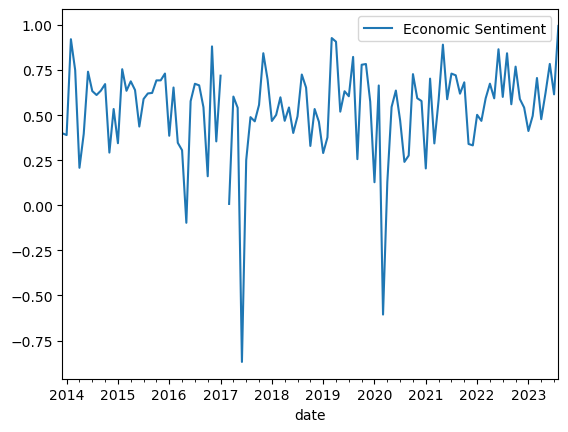

In [113]:
busecon_news["sentiment"] = ss_df["compound"].tolist()
busecon_sent = busecon_news.set_index("date").groupby(pd.Grouper(freq="M"))[["sentiment"]].mean().reset_index()
busecon_sent.plot(x="date", y="sentiment", label="Economic Sentiment");